In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%reload_ext lab_black

In [3]:
import logging
import string
import sys
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr
from replay_trajectory_classification import ClusterlessClassifier

from src.figure_utilities import set_figure_defaults
from src.parameters import TRANSITION_TO_CATEGORY

set_figure_defaults()

In [4]:
from src.parameters import ANIMALS
from loren_frank_data_processing import make_epochs_dataframe

epoch_info = make_epochs_dataframe(ANIMALS)
epoch_info.environment.value_counts()

nan             501
WTrackA          93
TrackB           57
TrackA           51
WTrackB          48
OpenFieldA       44
LinearA          33
OpenFieldB       27
sleep             9
wtrack            6
WTrackA-fail      1
Name: environment, dtype: int64

In [5]:
from loren_frank_data_processing import make_tetrode_dataframe

tetrode_info = make_tetrode_dataframe(ANIMALS)
tetrode_info.area.astype(str).str.upper().value_counts()

CA1          9078
NAN          4367
CA3          3684
CA2          1935
DG           1922
CTX          1678
DEAD          630
LOST          630
CC            551
MEC           342
REFERENCE     317
???           270
SUBICULUM     244
CAN1REF       210
CAN2REF       210
[]            112
Name: area, dtype: int64

In [6]:
from loren_frank_data_processing import make_neuron_dataframe
from src.parameters import _BRAIN_AREAS
import pandas as pd

epoch_info = make_epochs_dataframe(ANIMALS)
neuron_info = make_neuron_dataframe(ANIMALS)
neuron_info = neuron_info.loc[
    (neuron_info.type == "principal")
    & (neuron_info.numspikes > 100)
    & neuron_info.area.isin(_BRAIN_AREAS)
]
n_neurons = (
    neuron_info.groupby(["animal", "day", "epoch"])
    .neuron_id.agg(len)
    .rename("n_neurons")
    .to_frame()
)

epoch_info = epoch_info.join(n_neurons)

is_brain_areas = tetrode_info.area.astype(str).str.upper().isin(_BRAIN_AREAS)
n_tetrodes = (
    tetrode_info.loc[is_brain_areas]
    .groupby(["animal", "day", "epoch"])
    .tetrode_id.aggregate(len)
    .astype(int)
    .rename("n_tetrodes")
    .to_frame()
)
epoch_info = epoch_info.join(n_tetrodes)

is_w_track = epoch_info.environment.isin(
    ["TrackA", "TrackB", "WTrackA", "WTrackB", "wtrack"]
)

animal = pd.DataFrame(epoch_info.reset_index().animal).set_index(epoch_info.index)
epoch_info = epoch_info.loc[
    (is_w_track & (epoch_info.n_neurons > 9)) | ((animal.animal == "remy") & is_w_track)
]
epoch_info

type environment  exposure  n_neurons  n_tetrodes
animal day epoch                                                  
Cor    1   2      run      TrackA       1.0       10.0        11.0
           4      run      TrackA       2.0       12.0        11.0
       2   2      run      TrackA       3.0       11.0        11.0
           4      run      TrackA       4.0       12.0        11.0
       3   2      run      TrackA       5.0       14.0        11.0
...               ...         ...       ...        ...         ...
remy   35  4      run      wtrack       2.0        NaN        24.0
       36  2      run      wtrack       3.0        NaN        24.0
           4      run      wtrack       4.0        NaN        24.0
       37  2      run      wtrack       5.0        NaN        24.0
           4      run      wtrack       6.0        NaN        24.0

[146 rows x 5 columns]

In [6]:
epoch_info.environment.value_counts()

TrackB     41
TrackA     37
WTrackA    36
WTrackB    26
wtrack      6
Name: environment, dtype: int64

In [7]:
epoch_info.type.value_counts()

run    146
Name: type, dtype: int64

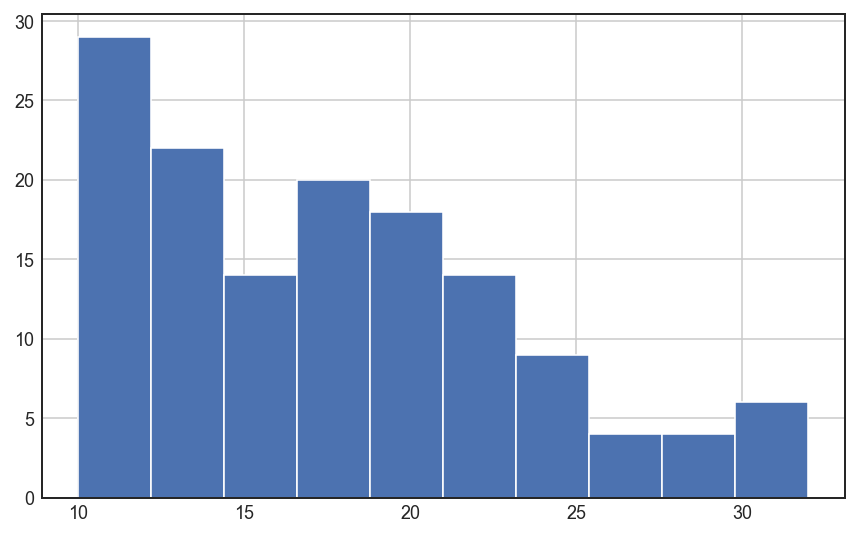

In [8]:
epoch_info.n_neurons.hist()

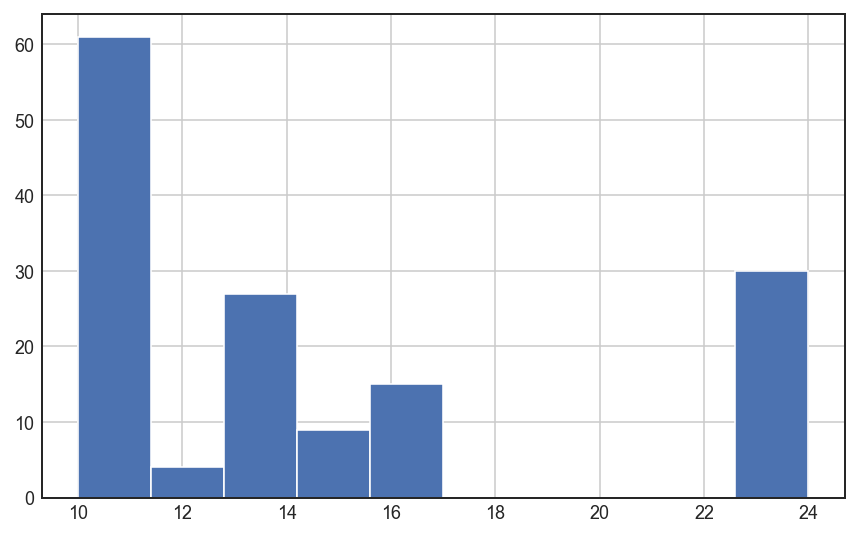

In [9]:
epoch_info.n_tetrodes.hist()

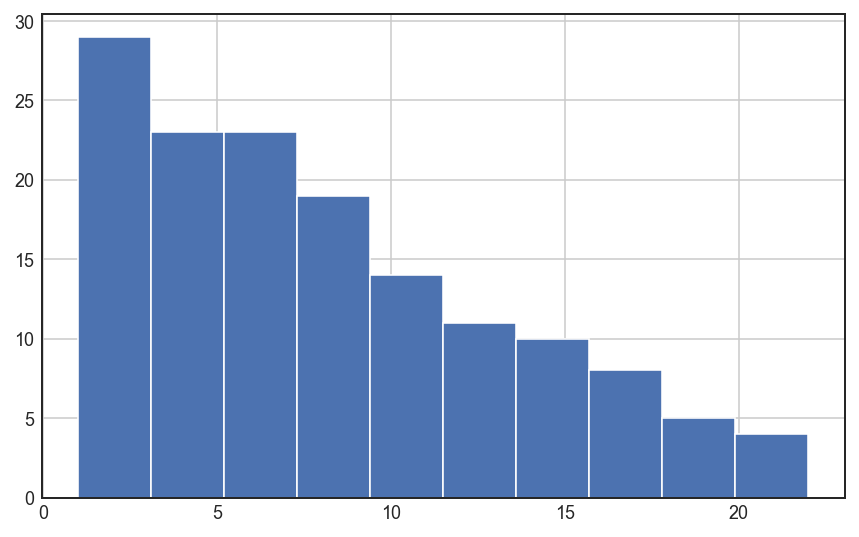

In [10]:
epoch_info.exposure.hist()

In [12]:
epoch_info.reset_index().animal.unique().size

10

In [7]:
np.percentile(epoch_info.n_tetrodes.values, [0, 50, 100])

array([10., 13., 24.])

In [12]:
np.gradient([0, 1, 2, 2], 500)

array([0.002, 0.002, 0.001, 0.   ])